In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [62]:
data = pd.read_csv("/content/drive/MyDrive/IBM/Churn_Modelling.csv")

In [63]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

VISUALIZATION 

UNIVARIATE ANALYSIS

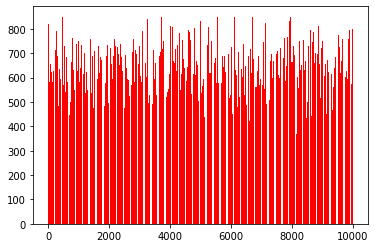

In [65]:
plt.bar(data.index,data['CreditScore'],color='red')
plt.show()

BIVARIATE ANALYSIS

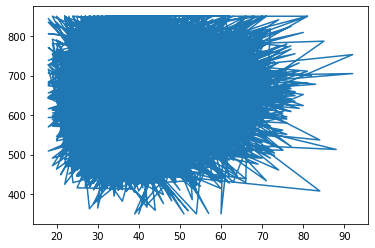

In [66]:
plt.plot(data['Age'],data['CreditScore'])

MULTIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


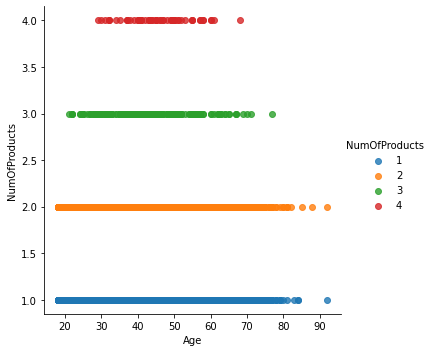

In [67]:
sns.lmplot("Age","NumOfProducts",data,hue="NumOfProducts", fit_reg=False)

DESCRIPTIVE STATISTICS

In [9]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


MISSING VALUE

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**OUTLIERS**

In [11]:
data_outliers = pd.DataFrame(index=data.columns, columns=['outliers', 'outliers%']) 
for col in data.columns:
  if any(x in str(data[col].dtype) for x in ['int', 'float']):data_outliers.loc[col, 'count'] = len(data)
data_outliers.loc[col, 'q1'] = data[col].quantile(0.25)
data_outliers.loc[col, 'q3'] = data[col].quantile(0.75)
data_outliers.loc[col, 'iqr'] = data_outliers.loc[col, 'q3'] - data_outliers.loc[col, 'q1']
data_outliers.loc[col, 'lower'] = data_outliers.loc[col, 'q1'] - (3 * data_outliers.loc[col, 'iqr'])
data_outliers.loc[col, 'upper'] = data_outliers.loc[col, 'q3'] + (3 * data_outliers.loc[col, 'iqr'])
data_outliers.loc[col, 'min'] = data[col].min()
data_outliers.loc[col, 'max'] = data[col].max()
data_outliers.loc[col, 'outliers'] = ((data[col] < data_outliers.loc[col, 'lower']) | (data[col] > data_outliers.loc[col,'upper'])).sum()
data_outliers.loc[col, 'outliers%'] = np.round(data_outliers.loc[col,
'outliers'] / len(data) *100)
data_outliers


,outliers,outliers%,count,q1,q3,iqr,lower,upper,min,max
RowNumber,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumOfProducts,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**ENCODING**


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


DEPENDENT & INDEPENDENT

In [16]:
y=data['Surname']
x=data.drop(columns=['Surname'],axis=1)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


SCALING

In [17]:
from sklearn.preprocessing import scale

In [18]:
names = x.columns

In [19]:
X = scale(x)

In [20]:
X

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476, -1.53679418, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [21]:
x=pd.DataFrame(x,columns=names)

In [22]:
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


TRAINING & TESTING

In [23]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train,x_test,y_train,y_test
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


(None, None)